# Clasificación de texto

## Carga de datos y paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
import os

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
datos = pd.read_csv('muestra_clasificador.csv', sep='|').dropna()
datos.head()

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion,categoria_pfm
0,11,319249942,45,20180305,111143,49520.98,presentacion impuesto predial unificado,gobierno,municipios,actividades ejecutivas administracion publica ...,pago de deudas
1,15,346095462,47,20180619,153159,125779.58,saldo,medios comunicacion,telefonia fija,servicios telefonia fija,tecnologia y comunicaciones
2,16,228320905,49,20161125,130737,75313.50,referencia express,medios comunicacion,valor agregado,actividades telecomunicaciones inalambricas,tecnologia y comunicaciones
3,17,249117129,49,20170327,83646,82913.43,referencia express,medios comunicacion,valor agregado,actividades telecomunicaciones inalambricas,tecnologia y comunicaciones
4,18,278487871,49,20170829,102756,67414.37,referencia express,medios comunicacion,valor agregado,actividades telecomunicaciones inalambricas,tecnologia y comunicaciones


In [3]:
datos.categoria_pfm.unique()

array(['pago de deudas', 'tecnologia y comunicaciones', 'hogar',
       'educacion', 'viajes', 'otros', 'transporte', 'cuidado personal',
       'entretenimiento', 'comida', 'moda', 'mascotas'], dtype=object)

In [4]:
datos.shape

(2081259, 11)

## Casteo de datos y elección de variables

In [5]:
factor = pd.factorize(datos['categoria_pfm'])
datos.cat_pfm = factor[0]
label = factor[1]
col = ['ref1', 'categoria_pfm']
datos = datos[col]
datos['categoria_pfm'] = factor[0]
datos.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,ref1,categoria_pfm
0,presentacion impuesto predial unificado,0
1,saldo,1
2,referencia express,1
3,referencia express,1
4,referencia express,1


## Procesamiento de datos para clasificar texto

Se procede a vectorizar los datos y a encontrar similitudes entre el texto para que el algoritmo de Machine Learning aprenda a identificar ciertos patrones en los textos.

In [6]:
tfidf = TfidfVectorizer (sublinear_tf = True, min_df = 5, norm = 'l2', ngram_range = (1, 2), stop_words = stopwords.words('spanish'))
features = tfidf.fit_transform(datos.ref1).toarray () 
labels = datos.categoria_pfm
features.shape

(2081259, 1703)

## Algoritmo de Machine Learning

Se procede a partir el conjunto de datos, en un conjunto de entrenamiento y prueba para entrenar el algoritmo. Se estiman dos algoritmos un Random Forest y un Multinomial Naive Bayes.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(datos['ref1'], datos['categoria_pfm'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

### Multinomial Naive Bayes

A continuación, se encuentran diferentes métricas para evaluar el rendimiento del algoritmo, tales como: matriz de confusión, precision y recall.

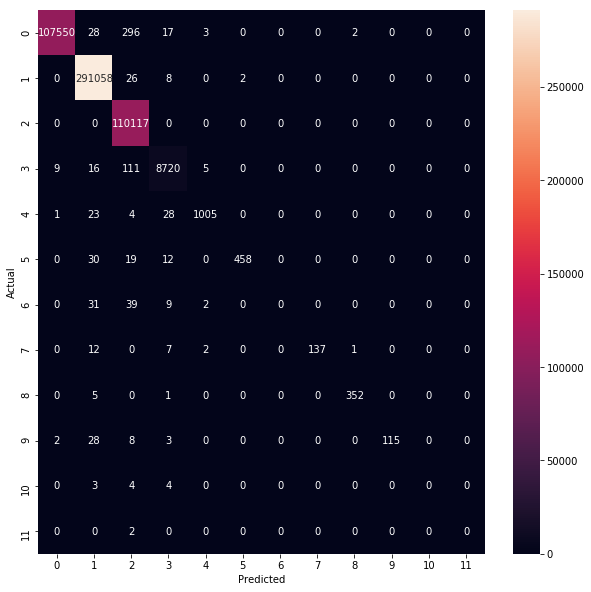

In [8]:
y_pred = clf.predict(X_test_tfidf)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [9]:
precision_score(y_test, y_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.99988844, 0.99939567, 0.99539891, 0.9898967 , 0.98820059,
       0.99565217, 0.        , 1.        , 0.9915493 , 1.        ,
       0.        , 0.        ])

In [10]:
recall_score(y_test, y_pred, average=None)

array([0.99679321, 0.99987633, 1.        , 0.98408757, 0.9472196 ,
       0.88246628, 0.        , 0.86163522, 0.98324022, 0.73717949,
       0.        , 0.        ])

### Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)
conf_mat = confusion_matrix(y_test, y_pred)

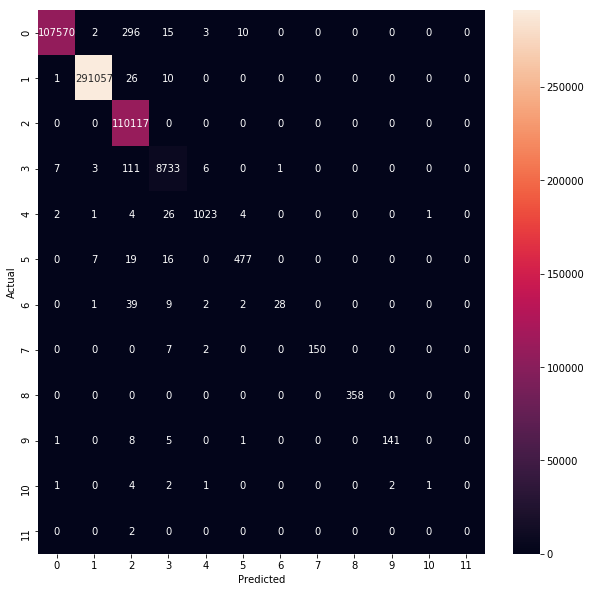

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
precision_score(y_test, y_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.99988846, 0.9999519 , 0.99539891, 0.98979939, 0.98649952,
       0.96558704, 0.96551724, 1.        , 1.        , 0.98601399,
       0.5       , 0.        ])

In [14]:
recall_score(y_test, y_pred, average=None)

array([0.99697857, 0.99987289, 1.        , 0.98555468, 0.96418473,
       0.91907514, 0.34567901, 0.94339623, 1.        , 0.90384615,
       0.09090909, 0.        ])

## Carga de datos a clasificar y clasificación en datos a etiquetar

Se procede a cargar los datos que no estan etiquetados, para clasificarlos con los clasificadores estimados anteriormente.

In [15]:
data = pd.read_csv('muestra_target.csv', sep='|')
data.head()

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion
0,1,222356110,10,20161016,3424,148438.37,referencia contrato valor,sininfo,sininfo,sininfo
1,4,235344690,18,20170106,201317,670645.57,medicina prepagada colsanitas,sininfo,sininfo,sininfo
2,5,320049316,18,20180307,143513,706933.70,colsanitas,sininfo,sininfo,sininfo
3,9,282076350,26,20170914,70026,100277.45,factura conjunto residencial pietra santa,sininfo,sininfo,sininfo
4,10,300800637,26,20171212,152115,165877.09,factura conjunto residencial pietra santa,sininfo,sininfo,sininfo


In [17]:
data = data.sample(1000000)
data.shape

(1000000, 10)

In [18]:
nuevos_counts = count_vect.transform(data['ref1'])
nuevos_tfidf = tfidf_transformer.transform(nuevos_counts)

### Etiquetado

In [19]:
data['categoria_pfm'] = rf.predict(nuevos_tfidf)
data.head(20)

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion,categoria_pfm
5459153,9967278,255957609,24784,20170502,155158,15407.13,recarga,sininfo,sininfo,sininfo,1
1129716,2070320,330498719,125487,20180417,194417,80365.64,factura,sininfo,sininfo,sininfo,5
2623915,4798839,353504705,183855,20180717,65433,71673.42,contractid addreess,sininfo,sininfo,sininfo,3
5210260,9518158,372620181,179000,20180927,220833,402484.93,payu falabella,sininfo,sininfo,sininfo,3
4016126,7344427,330821944,167564,20180419,73859,248164.45,prestamo lineru,sininfo,sininfo,sininfo,0
2393978,4376053,274381875,139018,20170806,95428,541555.70,compra municipio predial,sininfo,sininfo,sininfo,0
6027544,10998580,265949726,74540,20170623,102555,2660.96,certificadosvirtuales,sininfo,sininfo,sininfo,3
1408093,2576597,338762603,105839,20180521,131305,113453.59,contractid addreess,sininfo,sininfo,sininfo,3
3656001,6674011,357369187,174130,20180801,155152,900595.52,banco tarjeta credito visa,sininfo,sininfo,sininfo,0
2858927,5222783,243024899,163368,20170220,140614,2658.68,servicios virtuales camara comercio,sininfo,sininfo,sininfo,0


In [21]:
label

Index(['pago de deudas', 'tecnologia y comunicaciones', 'hogar', 'educacion',
       'viajes', 'otros', 'transporte', 'cuidado personal', 'entretenimiento',
       'comida', 'moda', 'mascotas'],
      dtype='object')

In [24]:
data['categoria_pfm'] = data['categoria_pfm'].replace({0:'pago de deudas', 1:'tecnologia y comunicaciones',
                               2:'hogar', 3:'educacion', 4:'viajes', 5:'otros',
                              6:'transporte', 7:'cuidado personal', 8:'entretenimiento',
                              9:'comida', 10:'moda', 11:'mascotas'})
data.head(10)

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion,categoria_pfm
5459153,9967278,255957609,24784,20170502,155158,15407.13,recarga,sininfo,sininfo,sininfo,tecnologia y comunicaciones
1129716,2070320,330498719,125487,20180417,194417,80365.64,factura,sininfo,sininfo,sininfo,otros
2623915,4798839,353504705,183855,20180717,65433,71673.42,contractid addreess,sininfo,sininfo,sininfo,educacion
5210260,9518158,372620181,179000,20180927,220833,402484.93,payu falabella,sininfo,sininfo,sininfo,educacion
4016126,7344427,330821944,167564,20180419,73859,248164.45,prestamo lineru,sininfo,sininfo,sininfo,pago de deudas
2393978,4376053,274381875,139018,20170806,95428,541555.70,compra municipio predial,sininfo,sininfo,sininfo,pago de deudas
6027544,10998580,265949726,74540,20170623,102555,2660.96,certificadosvirtuales,sininfo,sininfo,sininfo,educacion
1408093,2576597,338762603,105839,20180521,131305,113453.59,contractid addreess,sininfo,sininfo,sininfo,educacion
3656001,6674011,357369187,174130,20180801,155152,900595.52,banco tarjeta credito visa,sininfo,sininfo,sininfo,pago de deudas
2858927,5222783,243024899,163368,20170220,140614,2658.68,servicios virtuales camara comercio,sininfo,sininfo,sininfo,pago de deudas


In [25]:
data.to_csv('prediccion_random_forest.csv')

In [26]:
data['categoria_pfm'] = clf.predict(nuevos_tfidf)
data.head(20)

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion,categoria_pfm
5459153,9967278,255957609,24784,20170502,155158,15407.13,recarga,sininfo,sininfo,sininfo,1
1129716,2070320,330498719,125487,20180417,194417,80365.64,factura,sininfo,sininfo,sininfo,1
2623915,4798839,353504705,183855,20180717,65433,71673.42,contractid addreess,sininfo,sininfo,sininfo,1
5210260,9518158,372620181,179000,20180927,220833,402484.93,payu falabella,sininfo,sininfo,sininfo,1
4016126,7344427,330821944,167564,20180419,73859,248164.45,prestamo lineru,sininfo,sininfo,sininfo,0
2393978,4376053,274381875,139018,20170806,95428,541555.70,compra municipio predial,sininfo,sininfo,sininfo,0
6027544,10998580,265949726,74540,20170623,102555,2660.96,certificadosvirtuales,sininfo,sininfo,sininfo,1
1408093,2576597,338762603,105839,20180521,131305,113453.59,contractid addreess,sininfo,sininfo,sininfo,1
3656001,6674011,357369187,174130,20180801,155152,900595.52,banco tarjeta credito visa,sininfo,sininfo,sininfo,3
2858927,5222783,243024899,163368,20170220,140614,2658.68,servicios virtuales camara comercio,sininfo,sininfo,sininfo,3


In [27]:
data['categoria_pfm'] = data['categoria_pfm'].replace({0:'pago de deudas', 1:'tecnologia y comunicaciones',
                               2:'hogar', 3:'educacion', 4:'viajes', 5:'otros',
                              6:'transporte', 7:'cuidado personal', 8:'entretenimiento',
                              9:'comida', 10:'moda', 11:'mascotas'})
data.head(10)

,Unnamed: 0,id_trn_ach,id_cliente,fecha,hora,valor_trx,ref1,sector,subsector,descripcion,categoria_pfm
5459153,9967278,255957609,24784,20170502,155158,15407.13,recarga,sininfo,sininfo,sininfo,tecnologia y comunicaciones
1129716,2070320,330498719,125487,20180417,194417,80365.64,factura,sininfo,sininfo,sininfo,tecnologia y comunicaciones
2623915,4798839,353504705,183855,20180717,65433,71673.42,contractid addreess,sininfo,sininfo,sininfo,tecnologia y comunicaciones
5210260,9518158,372620181,179000,20180927,220833,402484.93,payu falabella,sininfo,sininfo,sininfo,tecnologia y comunicaciones
4016126,7344427,330821944,167564,20180419,73859,248164.45,prestamo lineru,sininfo,sininfo,sininfo,pago de deudas
2393978,4376053,274381875,139018,20170806,95428,541555.70,compra municipio predial,sininfo,sininfo,sininfo,pago de deudas
6027544,10998580,265949726,74540,20170623,102555,2660.96,certificadosvirtuales,sininfo,sininfo,sininfo,tecnologia y comunicaciones
1408093,2576597,338762603,105839,20180521,131305,113453.59,contractid addreess,sininfo,sininfo,sininfo,tecnologia y comunicaciones
3656001,6674011,357369187,174130,20180801,155152,900595.52,banco tarjeta credito visa,sininfo,sininfo,sininfo,educacion
2858927,5222783,243024899,163368,20170220,140614,2658.68,servicios virtuales camara comercio,sininfo,sininfo,sininfo,educacion


In [28]:
data.to_csv('prediccion_naive_bayes.csv')